# Импорты

In [2]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# 5  Комбинаторика

## 5.1 Правило сложения и правило умножения. Основные формулы

In [3]:
# Выбор упорядоченных элементов

def ank(k, n):
    A_n_k = sp.factorial(n) \
        / sp.factorial(n - k)
    return A_n_k

In [4]:
# Выбор неупорядоченных элементов

def cnk(k, n):
    C_n_k = sp.factorial(n) \
        / (sp.factorial(k) * sp.factorial(n - k))
    return C_n_k

In [5]:
# У мамы 2 яблока и 3 груши. Каждый день в течение 5 дней подряд она выдает по одному фрукту.

# Сколькими способами это может быть сделано?

ank(5, 5) / (ank(3, 3) * ank(2, 2))

10

In [6]:
# В некоторой газете 12 страниц. Необходимо на страницах этой газеты поместить четыре фотографии.

# Сколькими способами можно это сделать, если ни одна страница газеты не должна содержать более одной фотографии?

print(12 * 11 * 10 * 9)

ank(4, 12)

11880


11880

In [7]:
# Из трех математиков и десяти экономистов нужно составить комиссию, 
# в состав которой войдет семь человек. 
# При этом в ней должен участвовать хотя бы один математик.

# Сколькими способами может быть составлена комиссия?

q = cnk(7, 13) # всего вариантов создания комиссий
w = cnk(7, 10) # всего вариантов создания комиссий только из экономистов

print(q - w)
print(w)
print()

# 1) Один математик, шесть экономистов
a = cnk(6, 10) * cnk(1, 3)
print(a)

# 2) Два математика, пять экономистов
b = cnk(5, 10) * cnk(2, 3)
print(b)

# 3) Три математика, четыре экономиста
c = cnk(4, 10) * cnk(3, 3)
print(c)

print(a + b + c)

1596
120

630
756
210
1596


In [8]:
# Сколько существует шестизначных чисел, состоящих из ненулевых попарно различных цифр?

print(9 * 8 * 7 * 6 * 5 * 4)

ank(6, 9)

60480


60480

In [9]:
# В группе 9 человек.

# Сколько можно образовать разных подгрупп при условии, что в подгруппу входит не менее 2 человек?
# Количество подгрупп в каждом разбиении ровно две.

cnk(2, 9) + cnk(3, 9) + cnk(4, 9)

246

In [10]:
# Для участия в команде тренер отбирает 5 мальчиков из 10.

# Сколькими способами он может сформировать команду, если 2 определенных мальчика должны войти в команду?

cnk(2, 2) * cnk(3, 8)

56

In [11]:
# В классе 14 девочек и 12 мальчиков.

# Сколькими способами можно выбрать ученика из этого класса?

14 + 12

26

In [12]:
# В шахматном турнире принимали участие 15 шахматистов, причем каждый из них сыграл только одну партию с каждым из остальных.

# Сколько всего партий было сыграно в этом турнире?

n = 15

print(int(n * (n - 1) / 2))

cnk(2, 15)

105


105

In [13]:
# Сколькими способами можно распределить 4 билета в театр среди 20 студентов группы, 
# если каждый студент может получить не более 2-х билетов, и все билеты считаются равнозначными?

a = cnk(4, 20) # по одному билету (4 студента)
b = cnk(2, 20) # по два билета (2 студента)
c = cnk(3, 20) * cnk(1, 3) # два билета и по одному (3 студента) и из трех студентов, кому достанется 3 бтлета

print(a + b + c)

# четыре студента получили по одному билету
a = cnk(4, 20)

# два студента получили по два билета
b = cnk(2, 20)

# два студента получили по одному билету, один - два билета
# (количество сочетаний студентов, которые получили по одному билету. 
# Затем умножаем на количество оставшихся 18 студентов из которых один получит сразу два билета)
c = cnk(2, 20) * cnk(1, 18)

print(a + b + c)

8455
8455


In [14]:
# Сколькими способами можно распределить 2 билета в театр и 2 билета на концерт среди 20 студентов группы, 
# если каждый студент может получить не более 2-х билетов, и билеты на одно мероприятие считаются равнозначными?

# Два студента получили по билету на концерт И два других студента - по билету в театр (ИЛИ один студент получил сразу два билета)
# выбираем из 18 студентов, т.к. не можем вручить больше двух билетов, а у нас уже есть два студента с билетом и у них будет уже три. 
# Поэтому этих студентов исключаем
a = cnk(2,20)*(cnk(2,20)+cnk(1,18))

# Один студент получил два билета на концерт И два других студента - по билету в театр (ИЛИ один - два билета)
b = cnk(1,20)*(cnk(2,19)+cnk(1,19))

a + b

43320

## 5.2 Перестановки с повторениями

In [15]:
# Размещения с повторениями

def amk(m, n):
    A_m_k = n ** m
    return A_m_k

In [16]:
# Сочетания с повторениями

def cmk(m, n):
    C_m_k = sp.factorial(n + m - 1) \
        / (sp.factorial(m) * sp.factorial(n - 1))
    return C_m_k

In [17]:
# У мальчика остались от набора для настольной игры штампы с цифрами 1, 3 и 7. 
# Он решил с помощью этих штампов нанести на все книги пятизначные номера – составить каталог.

# Сколько различных пятизначных номеров может составить мальчик?

n = 5
m = 3
amk(5, 3)

243

In [18]:
# В технической библиотеке имеются книги по математике, физике, химии и т. д., 
# всего по 16 разделам науки. 
# Поступил заказ на очередные 4 книги.

# Сколько существует вариантов такого заказа?

n = 16
k = 4

cnk(k, n + (k - 1))

3876

In [19]:
# Девятнадцать депутатов Городского Собрания выбирают Председателя из пяти кандидатов. 
# Каждый голосует ровно за одного из них. 
# После голосования составляется протокол заседания, 
# в котором указывается лишь количество голосов за каждого кандидата 
# (без указания, кто за кого  проголосовал).

# Сколько различных протоколов может получиться?

n = 19
k = 5

cnk(n, n + (k - 1))

8855

In [20]:
# Сколько всего чисел (не больше 100000) можно составить из цифр 1, 2, 3, 4 и 5 
# в каждом из которых цифры расположены в неубывающем порядке?

n = 5

total = 0

for k in range(1, 6):
    total += cnk(n - 1, n + (k - 1))

total

251

## 5.3 Формула включений-исключений

In [21]:
# Каждый студент группы побывал в театре или в кино. В театр сходили 22 человека. В кино были 15 человек. И в театре, и в кино были 7 человек.

# Сколько студентов в группе?

t = 22
k = 15
tk = 7

t + k - tk

30

In [22]:
# На одной из кафедр университета работают 13 человек, причем каждый из них знает хотя бы один иностранный язык. 
# Десять человек знают английский, 
# семеро - немецкий, 
# шестеро - французский, 
# пятеро знают английский и немецкий , 
# четверо - английский и французский, 
# трое - немецкий и французский.

# Выяснить:

# сколько человек знают все три языка?
# сколько человек знают ровно два языка? 
# В качестве ответа укажите сумму значений, полученных для 1 и anf пунктов.

t = 13
a = 10
n = 7
f = 6
an = 5
af = 4
nf = 3

anf = 13 - 10 - 7 - 6 + 5 + 4 + 3
print(anf)

Nanf = (an - anf) + (af - anf) + (nf - anf)
print(Nanf)

2
6


In [23]:
# При обследовании читательских вкусов студентов оказалось, 
# что 60 % студентов читают журнал А, 
# 50 % - журнал В, 
# 50 % - журнал С, 
# 30 % - журналы А и В, 
# 20 % - журналы В и С, 
# 40 % - журналы А и С, 
# 10 % - журналы А, В и С.

# Выяснить, сколько процентов студентов:

# не читает ни одного из журналов?
# читает в точности два журнала?
# читает не менее двух журналов?

# В качестве ответа укажите сумму значений (в процентах), полученных для 1, 2 и 3 пунктов.

A = 60
B = 50
C = 50
AB = 30
BC = 20
AC = 40
ABC = 10

N = 100 - (A + B + C - AB - BC - AC + ABC)
print(N)

N2 = (AB - ABC) + (BC - ABC) + (AC - ABC)
print(N2)

N1_2 = 100 - N - ABC
print(N1_2)

N + N2 + N1_2

20
60
70


150

## 5.4  Задания

In [24]:
# Предприятие может предоставить работу по одной специальности 4 женщинами, 
# по другой - 6 мужчинам, по третьей - 3 работникам независимо от пола.

# Сколькими способами можно заполнить вакантные места, если имеются 14 претендентов: 6 женщин и 8 мужчин?

cnk(4, 6) * cnk(6, 8) * cnk(3, 4)

1680

In [25]:
# В книжном магазине есть 7 экземпляров романа Достоевского «Идиот», 
# 4 экземпляра его же романа «Братья Карамазовы» и 5 экземпляров «Преступление и наказание». 
# Кроме того есть 5 томов, содержащих романы «Идиот» и «Преступление и наказание», 
# и 7 томов, содержащих «Преступление и наказание» и «Братья Карамазовы».

# Сколькими способами можно сделать покупку, содержащую по одному экземпляру каждого из романов?

7 * 4 * 5 + 5 * 4 + 7 * 7

209

In [26]:
# Сколько различных натуральных делителей имеет число 15552?

# Разложение на простые множители

n = 15552

stepeni = dict()

for i in range(2, 20):
    if n > 1:
        cnt_stepeni = 0
        while n % i == 0:
            cnt_stepeni += 1
            n //= i
        stepeni[i] = cnt_stepeni
print(stepeni)

print(2**6 * 3**5)

7 * 6

{2: 6, 3: 5}
15552


42

In [27]:
# Сколькими способами можно расставить девять различных книг на полке, чтобы определенные четыре книги стояли рядом?

sp.factorial(4) * sp.factorial(6)

17280

In [28]:
# Сколько разных буквосочетаний (перестановок букв в исходном слове) можно сделать из букв слова «Миссисипи»?

s = 'Миссисипи'
n = len(s)
print(f'Всего букв: {n}')

repeated_letters = dict()

for i in set(s):
    cnt = s.count(i)
    if cnt > 1:
        repeated_letters[i] = cnt

print(repeated_letters)

sp.factorial(n) / (sp.factorial(4) * sp.factorial(3))

Всего букв: 9
{'и': 4, 'с': 3}


2520

In [29]:
# В классе 12 учеников.

# Сколькими способами их можно разбить на две группы (первую и вторую), состоящие из четного числа человек?

n = 12

for i in range(2, n // 2 + 1):
    if i % 2 == 0:
        print(i, '-', n - i)

(cnk(2, 12) + cnk(4, 12) + cnk(6, 12)) * 2 - cnk(6, 12)

# Минус cnk(6, 12), так как группы 6 - 6 одинаковые и дублирование не нужно

2 - 10
4 - 8
6 - 6


2046

In [30]:
# Сколькими способами тренер может скомплектовать хоккейную команду, 
# состоящую из одного вратаря, 
# двух защитников и 
# трех нападающих, 
# если в его распоряжении есть 2 вратаря, 5 защитников и 8 нападающих?

cnk(1, 2) * cnk(2, 5) * cnk(3, 8)

1120

In [31]:
# Имеется 10 белых и 5 черных шаров.

# Сколькими способами можно выбрать 7 шаров, чтобы среди них были 3 черных?

cnk(3, 5) * cnk(4, 10)

2100

In [32]:
# Десять команд участвуют в розыгрыше первенства по футболу, лучшие из которых занимают 1-е, 2-е и 3-е место. 
# Две команды, занявшие последние места, не будут участвовать в следующем таком же первенстве.

# Сколько разных вариантов результата первенства может быть, 
# если учитывать только положение первых трех и последних двух команд?

# Комментарий: результат первенства здесь - это распределение команд по первым трем местам, 
# а также знание о том, какие команды выбывают (их порядок - последнее или предпоследнее место - не важен).

ank(3, 10) * cnk(2, 7)

15120

In [33]:
# Сколько существует перестановок букв слова «конус», в которых буквы к, о, н стоят рядом?

a1 = (sp.factorial(3) * sp.factorial(2)) * 3
print(a1)

a2 = sp.factorial(3) * sp.factorial(3)
print(a2)

36
36


In [34]:
# У Васи есть 7 книг по математике, а у Вани – девять. Все 16 книг разные.

# Сколькими способами они смогут обменяться тремя книгами (то есть, дать три книги в обмен на три книги)?

cnk(3, 7) * cnk(3, 9)

2940

In [35]:
# Дано слово ЛОГАРИФМ. 
# Сколько существует способов поменять местами буквы в этом слове так, 
# чтобы в полученном буквосочетании согласные были упорядочены по алфавиту слева направо?

print(len('ЛОГАРИФМ'))

cnk(5, 8) * sp.factorial(3)

8


336

In [36]:
# В наличии есть все семь книг про Гарри Поттера.

# Сколькими способами можно расставить эти семь томов на три различные книжные полки так, чтобы на каждой полке стояла хотя бы одна книга?
# (Расстановки, которые отличаются порядком книг на полке, считаются различными.)

n = 7
k = 3

cnk(k - 1, n - 1) * sp.factorial(7)

75600

## 5.5  Задания*

In [37]:
# На некоторой прямой произвольным образом отмечены 10 точек, а на параллельной ей прямой – 12 точек.

# Сколько существует треугольников и четырехугольников с вершинами в этих точках?

# Количество возоможных точек на одной прямой * количество возможных точек на другой прямой. 
# Отдельно для треугольника и прямоугольника, потом суммируем

tr = 10 * cnk(2, 12) + 12 * cnk(2, 10)
print(tr)

quad = cnk(2, 12) * cnk(2, 10)
print(quad)

tr + quad

1200
2970


4170

In [38]:
# Семь девушек водят хоровод.

# Сколькими различными способами они могут встать вкруг?

sp.factorial(7 - 1)

720

In [39]:
# Сколько существует способов рассадить за круглый стол 5 юношей и 5 девушек так, чтобы они чередовались?
# Будем счиать, что "рассадки", отличающиеся поворотом, - одинаковые.

a = sp.factorial(5) # рассадка юношей
b = sp.factorial(5) # рассадка девушек

a * b / 5 # деление 5, так как для каждого произвольного варианта существует пять аналогичных ему, которые эквивалентны вращению

2880

In [40]:
# Тест по английскому языку сдавали 10 абитуриентов. 
# Известно, что любые пять абитуриентов ответили вместе на все вопросы, 
# а любые четыре абитуриента ответили вместе не на все вопросы.

# При каком наименьшем количестве вопросов теста такое могло случиться?

cnk(4, 10)

210

In [41]:
# Пять человек подбросили в воздух свои шляпы. 
# Шляпы вернулись этим же людям (по одной — каждому), но в произвольном порядке.

# Сколько существует таких возможностей, чтобы никто из них не получил своей шляпы обратно?

sp.factorial(5) - 5 * 24 + 10* 6 - 10*2 + 5*1 - 1

44

In [42]:
# Старуха Шапокляк решила обзавестись коллекцией из 50 саквояжей. 
# В магазине ей на выбор предложили оранжевые, зелёные, фиолетовые и голубые саквояжи.

# Сколькими способами она может сделать покупку?
# Саквояжи одного цвета считаются идентичными.

n = 50
k = 4

cnk(k - 1, n + (k - 1))

23426

In [43]:
# Класс из 20 учеников разделён на две половины так, 
# что каждый школьник из первой половины дружит ровно с шестью одноклассниками, 
# а каждый школьник из второй половины дружит ровно с четырьмя одноклассниками.

# Найдите число таких различных компаний из трёх учеников, 
# что в них либо все школьники дружат друг с другом, 
# либо каждый не дружит ни с одним из двух оставшихся.

t = cnk(3, 20) # всего учеников


# 6  Теория вероятностей

## 6.1 Условная и полная вероятность. Формула Байеса

In [44]:
# Есть четыре кубика с цифрами на гранях 1, 2, ..., 6 
# и одна правильная пирамида с цифрами на гранях 1, 2, 3, 4.
# Наугад выбрали предмет и бросили. Выпала цифра 4.

# Какова вероятность того, что взяли кубик?
# Ответ округлите до сотых.

P_H1 = 4 / 5 # вероятность выбрать кубик из пяти предметов
P_H2 = 1 / 5 # вероятность выбрать пирамида из пяти предметов
P_A_H1 = 1 / 6 # вероятность выбросить цифру 4 при условии, что кидаем кубик
P_A_H2 =  1 / 4 # вероятность выбросить цифру 4 при условии, что кидаем пирамиду
P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2 # Полная вероятность выбросить цифру 4

# P_H1_A * P_A = P_A_H1 * P_H1 - формула Байеса

P_H1_A = (P_A_H1 * P_H1) / P_A
round(P_H1_A, 2)

0.73

In [45]:
# Из четырех человек А, Б, В, Г один (А) получил правдивую информацию, 
# которую в виде сигнала ДА или НЕТ сообщает второму (Б), 
# второй - третьему (В), третий - четвертому (Г), 
# а последний сообщает результат полученной информации таким же образом, как и все другие. 
# Известно, что каждый из них верно повторяет услышанное только в одном случае из трех.

# Какова вероятность, что первый из этих лгунов сказал правду, если четвертый сказал правду?
# Ответ округлите до сотых.

P_H1 = 1 / 3 # вероятность, что А сказал "да"
P_H2 = 1 - P_H1 # вероятность, что А сказал "нет"

# Событие C - Г сказал "да"

# БВГ сказали "да" 
# + Б сказал "да", а ВГ сказали "нет" 
# + В сказал "да", а БГ сказали "нет" 
# + Г сказал "да", а БВ сказали "нет". 

# При всех этих случаях Г передаст истинную информацию, которую изначально передали А 
# при условии, что А не солгал.

P_C_H1 = P_H1**3 + P_H1 * P_H2**2 + P_H1 * P_H2**2 + P_H1 * P_H2**2

# БВ сказали "да", а Г сказал "нет" + 
# БГ сказали "да", В сказал "нет" + 
# ВГ сказали "да", Б сказал "нет" + 
# БВГ сказали "нет". 
# При всех этих случаях Г передаст истинную информацию, которую изначально передали А 
# при условии, что А солгал.

# При всех этих случаях Г передаст истинную информацию, которую изначально передали А 
# при условии, что А не солгал.

P_C_H2 = P_H1**2 * P_H2 + P_H1**2 * P_H2 + P_H1**2 * P_H2 + P_H2**3


# Полная вероятность, что на выходе получили "да"
P_C = P_H1 * P_C_H1 + P_H2 * P_C_H2

P_H1_C = (P_C_H1 * P_H1) / P_C
round(P_H1_C, 2)

0.32

In [46]:
# В пирамиде 5 винтовок, три из которых снабжены оптическим прицелом. 
# Вероятность того, что стрелок поразит мишень при выстреле из винтовки с оптическим прицелом, равна 0,95; 
# для винтовки без оптического прицела эта вероятность равна 0,7.

# Найти вероятность того, что мишень будет поражена, если стрелок производит один выстрел из наудачу взятой винтовки.

P_H1 = 3 / 5 # вероятность взять винтовку с оптическим прицелом
P_H2 = 2 / 5 # вероятность взять винтовку без оптического прицела
P_A_H1 = 0.95 # вероятность поразить мишень при выстреле из винтовки с оптическим прицелом
P_A_H2 = 0.7 # вероятность поразить мишень при выстреле из винтовки без оптического прицела

P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2
round(P_A, 2)

0.85

In [47]:
# В студенческой группе 3 человека имеют высокий уровень подготовки, 
# 19 человек – средний и 3 – низкий. 
# Вероятности успешной сдачи экзамена для данных студентов соответственно равны: 0,95; 0,7 и 0,4. 
# Известно, что некоторый студент сдал экзамен.

# Какова вероятность того, что: он был подготовлен очень хорошо?
# Ответ округлите до сотых.

a = 3
b = 19
c = 3

N = a + b + c

P_H1 = a / N # вероятность человека из группы a
P_H2 = b / N # вероятность человека из группы b
P_H3 = c / N # вероятность человека из группы c
P_A_H1 = 0.95 # вероятность сдать экзамен человеку из группы a
P_A_H2 = 0.7 # вероятность сдать экзамен человеку из группы b
P_A_H3 = 0.4 # вероятность сдать экзамен человеку из группы c
P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2 + P_H3 * P_A_H3 # Полная вероятность сдать экзамен

# P_H1_A * P_A = P_A_H1 * P_H1 - формула Байеса

P_H1_A = (P_A_H1 * P_H1) / P_A
round(P_H1_A, 2)

0.16

In [48]:
# В студенческой группе 3 человека имеют высокий уровень подготовки, 19 человек – средний и 3 – низкий. 
# Вероятности успешной сдачи экзамена для данных студентов соответственно равны: 0,95; 0,7 и 0,4. 
# Известно, что некоторый студент сдал экзамен.

# Какова вероятность того, что: он был подготовлен средне?
# Ответ округлите до сотых.

P_H2_A = (P_A_H2 * P_H2) / P_A
round(P_H2_A, 2)

0.77

На рисунке изображена схема дорог.
Найти вероятность того, что турист, вышедший из пункта А, попадет в пункт В, <br>
если на развилке он наугад выбирает любую дорогу (кроме обратной, разумеется).

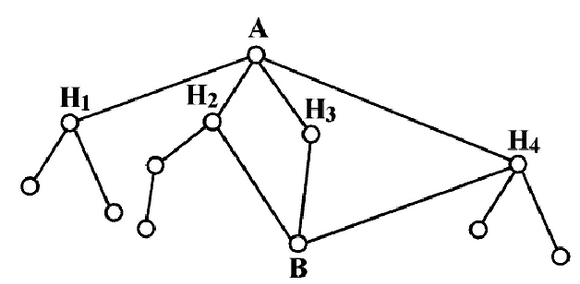

In [49]:
P_H1 = 1 / 4
P_H2 = 1 / 4
P_H3 = 1 / 4
P_H4 = 1 / 4
P_A_H1 = 0
P_A_H2 = 1 / 2
P_A_H3 = 1
P_A_H4 = 1 / 3

P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2 + P_H3 * P_A_H3 + P_H4 * P_A_H4
round(P_A, 3)

0.458

In [50]:
# Властелин, разгневавшись на мудреца, приказал отрубить тому голову. 
# Но затем дал мудрецу возможность попытаться спастись. 
# Итак, властелин взял 2 белых и 2 черных шара и предложил мудрецу распределить их по своему усмотрению по двум одинаковым урнам. 
# После чего, палач сначала наугад выберет одну из урн, а затем также наугад, не глядя, вытащит из неё один шар. 
# Мудрец будет помилован, если вытянутый шар оказался белым.

# Какую стратегию распределения шаров по урнам должен выбрать мудрец, чтобы быть помилованным? 
# Какова максимальная вероятность спастись мудрецу? 

# Ответ округлите до сотых.

P_H1 = P_H2 = 1 / 2

# 1) В первой урне 2 б, а во второй 2 ч.
P_A_1 = P_H1 = P_H2
print(round(P_A_1, 2))

# 2) В первой и во второй урнах по 1 б и 1 ч.
P_A_H1 = P_A_H2 = 1 / 2
P_A_2 = P_H1 * P_A_H1 + P_H2 * P_A_H2
print(round(P_A_2, 2))

# 3) В первой урне 1 б, а во второй 1 б и 2 ч.
P_A_H1 = 1
P_A_H2 = 1 / 3
P_A_3 = P_H1 * P_A_H1 + P_H2 * P_A_H2
print(round(P_A_3, 2))

# 4) В первой урне 1 ч, а во второй 2 б и 1 ч.
P_A_H1 = 0
P_A_H2 = 2 / 3
P_A_4 = P_H1 * P_A_H1 + P_H2 * P_A_H2
print(round(P_A_4, 2))

# 5) Первая урна пустая, во второй урне 2 б и 2 ч.
P_A_H1 = 0
P_A_H2 = 1 / 2
P_A_5 = P_H1 * P_A_H1 + P_H2 * P_A_H2
print(round(P_A_5, 2))

0.5
0.5
0.67
0.33
0.25


In [51]:
# Из двенадцати лотерейных билетов пять выигрышных. Билеты вытягиваются по одному без возвращения.

# Какова вероятность того, что во второй раз вытянут выигрышный билет?
# Ответ округлите до сотых.

P_H1 = 5 /12
P_H2 = 7 /12

P_A_H1 = 4 / 11
P_A_H2 = 5 / 11

P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2
round(P_A, 2)

0.42

In [52]:
# Задача В салоне связи было проведено исследование продаж розовых телефонов. 
# Выяснилось, что посетители женщины этот телефон покупают в 55% случаях, 
# мужчины – в 5% случаях и дети – в 15% случаях. 
# Среди посетителей салона 50% женщин, 40% мужчин и 10% детей.

# Найти вероятность того, что случайный покупатель приобретет этот товар.

a = 50
b = 40
c = 10

N = a + b + c

P_H1 = a / N # вероятность того, что человек - женщина
P_H2 = b / N # вероятность того, что человек - мужчина
P_H3 = c / N # вероятность того, что человек - ребенок
P_A_H1 = 0.55 # вероятность того, что женщина купит телефон 
P_A_H2 = 0.05 # вероятность того, что мужчина купит телефон 
P_A_H3 = 0.15 # вероятность того, что ребенок купит телефон 
P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2 + P_H3 * P_A_H3 # Полная вероятность сдать экзамен

P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2 + P_H3 * P_A_H3
round(P_A, 2)

0.31

In [53]:
# При обследовании больного имеется подозрение на одно из двух заболеваний H1 и H2. 
# Их вероятности в имеющихся условиях равны 0.6, 0.4.
# Для уточнения диагноза назначается обследование, результатом которого будет отрицательная или положительная реакция. 
# В случае болезни H1 вероятность положительной реакции равна 0.9, а в случае H2 — 0.5. 
# Обследования были проведены дважды и оба раза реакция оказалась отрицательной.

# Найдите вероятность заболевания H1 . 
# Ответ округлите до сотых.

P_H1 = 0.6 # вероятность болезни 1
P_H2 = 0.4 # вероятность болезни 2
P_A_H1 = 0.1**2 # вероятность 2 раза получить отрицательную реакцию болезни 1
P_A_H2 = 0.5**2 # вероятность 2 раза получить отрицательную реакцию болезни 2
P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2 # Полная вероятность получить отрицательную реакцию

# P_H1_A * P_A = P_A_H1 * P_H1 - формула Байеса

P_H1_A = (P_A_H1 * P_H1) / P_A
round(P_H1_A, 2)

0.06

## 6.2  Схема Бернулли

In [54]:
# Пусть монета брошена 5 раз. Требуется найти вероятность того, что выпало ровно 3 орла.

# Ответ введите без округлений.

p = 0.5
n = 5
k = 3
q = 1 - p

cnk(k, n) * p**k * q**(n-k)

0.312500000000000

In [55]:
# В 1693 году Джоном Смитом был поставлен следующий вопрос: 
# одинаковы ли шансы на успех у трех человек, если первому надо получить хотя бы одну шестерку при бросании игральной кости 6 раз, 
# второму - не менее двух шестерок при 12 бросаниях, 
# а третьему - не менее трех шестерок при 18 бросаниях.

N = [6, 12, 18]
res_list = []

for i in N:
    n = i
    k = n - n / 6 + 1
    p = 5 / 6
    q = 1 - p
    print(n, int(k))

    res = cnk(k, n) * p**k * q**(n-k)

    if i == 12 or i == 18:
        k += 1
        res += cnk(k, n) * p**k * q**(n-k)

        if i == 18:
            k += 1
            res += cnk(k, n) * p**k * q**(n-k)

    res = 1 - res
    res_list.append(res)

print(res_list)

6 6
12 11
18 16
[0.665102023319616, 0.618667373732309, 0.597345685947723]


In [56]:
# При некоторых условиях стрельбы вероятность p попадания в цель при одном выстреле равна 1 / 3.
# Произведено n=4 выстрела.

# Каково наивероятнейшее число попаданий в цель? 

n = 4
p = 1 / 3
q = 1 - p
K = 4

k_res_list = []

for k in range(K):
    print(k, round(cnk(k, n) * p**k * q**(n-k), 3))

0 0.198
1 0.395
2 0.296
3 0.099


## 6.3 Матожидание и дисперсия

In [57]:
# У дежурной в гостинице доска с 50 ключами. 
# Каждый ключ имеет номер и висит на своём крючке с таким же номером. 
# Однажды доска упала и все ключи рассыпались. 
# Дежурная собрала ключи, но в спешке развесила их в случайном порядке.

# Каково математическое ожидание числа ключей, которые оказались на своих местах?

n = 50

P_T = 1 / n # вероятность повесить ключ правильно
P_F = (n - 1) / n # вероятность повесить ключ неправильно

(1 * P_T + 0 * P_F) * n

1.0

In [58]:
# Издатель решил издать новую книгу. Продавать книгу он собирается за 280 руб., 
# из которых 200 получит он сам, 50 - книжный магазин и 30 - автор. 
# В таблице дана информация о затратах на издание книги и вероятности продажи определённого числа экземпляров книги.

# Найдите матожидание прибыли.

# Число проданных экземпляров	Вероятность	    Затраты
#           500	                    0,20	     225000
#           1000	                0,40	     250000
#           2000	                0,25	     300000
#           3000	                0,10	     350000
#           4000	                0,05	     400000

n_list = np.array([500, 1000, 2000, 3000, 4000])
P_list = np.array([0.20, 0.40, 0.25, 0.10, 0.05])
q_list = np.array([225000, 250000, 300000, 350000, 400000])

M = np.sum((n_list * 200 - q_list) * P_list)
M

25000.0

In [59]:
# Определить математическое ожидание случайной величины x числа попаданий при трёх выстрелах, 
# если вероятность попадания при каждом выстреле p=0.4

round(3 * 0.4, 2)

1.2

In [60]:
# Известно, что дискретная случайная величина X принимает лишь два значения: -3 и 7. 
# Кроме того, известно математическое ожидание: E(X) = 4.

# Найти дисперсию дискретной случайной величины.

E = 4
x1 = -3
x2 = 7

p = sp.Symbol('p')
expr = x1 * p + x2 * (1 - p) - E
p = sp.solve(expr, p)[0]

p1 = p
p2 = 1 - p
print('Вероятности х1 х2 =', p1, p2)

D = (x1 - E)**2 * p1 + (x2 - E)**2 * p2
print(float(D))

Вероятности х1 х2 = 3/10 7/10
21.0


In [61]:
# В урне 6 белых и 4 чёрных шара. 
# Из урны вынимают 3 шара. 
# Число белых шаров среди вынутых шаров является дискретной случайной величиной X.

# Найти математическое ожидание и дисперсию этой случайной величины.
# В ответ запишите их сумму.

# Гипергеометрическая вероятность

p0 = cnk(0, 6) * cnk(3, 4) / cnk(3, 10) 
p1 = cnk(1, 6) * cnk(2, 4) / cnk(3, 10) 
p2 = cnk(2, 6) * cnk(1, 4) / cnk(3, 10) 
p3 = cnk(3, 6) * cnk(0, 4) / cnk(3, 10) 

X = np.array([0, 1, 2, 3])
P = np.array([p0, p1, p2, p3])
M = np.sum(X * P)
print(M)
D = np.sum((X - M)**2 * P)
print(D)
print(float(M + D))

9/5
14/25
2.36


Дана функция распределения вероятностей непрерывной случайной величины: <br><br>
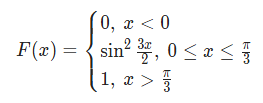

Найдите математическое ожидание и дисперсию непрерывной случайной величины. <br>
В ответ запишите их сумму. Ответ округлите до сотых.

In [62]:
# f(x) = F'(x)
# M(x) = integrate(x * f(x))
# D(x) = integrate((x - M(x)) * f(x)) 

x = sp.Symbol('x')
F = sp.sin(3*x/2)**2
display('Функция распределения вероятности', F)

f = sp.diff(F,x)
display('Функция плотности вероятности', f)

M = sp.integrate(x * f, (x, 0, sp.pi/3))
print(f'Математическое ожидание = {M}')

D = sp.integrate((x - M)**2 * f, (x, 0, sp.pi/3))
print(f'Дисперсия = {D}')

print('Ответ: {}'.format(round(M + D,2)))

'Функция распределения вероятности'

sin(3*x/2)**2

'Функция плотности вероятности'

3*sin(3*x/2)*cos(3*x/2)

Математическое ожидание = pi/6
Дисперсия = -2/9 + pi**2/36
Ответ: 0.58


У инвестора есть 4 альтернативных проекта инвестиций. <br>
В таблице обобщены данные об ожидаемой прибыли в этих проектах с соответствующей вероятностью. <br><br>
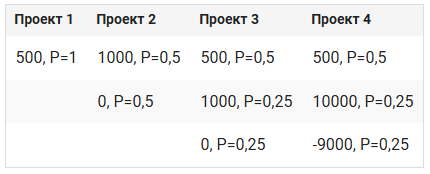 <br><br>
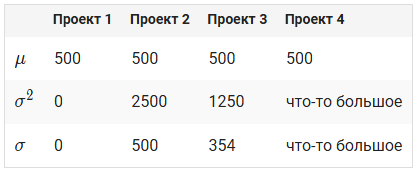 <br><br>
Если инвестор вкладывает деньги долгосрочно, то все варианты примерно одинаково прибыльны. <br>
При этом, чем выше стандартное отклонение, тем больше риск.

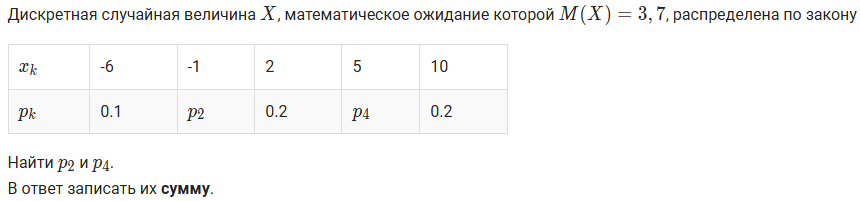

In [63]:
a, b = sp.symbols('a b')

X = np.array([-6, -1, 2, 5, 10])
P = np.array([0.1, a, 0.2, b, 0.2])
M = np.sum(X * P) - 3.7
display(M)
sp.solve(M, [a, b])

print(1 - (0.1 + 0.2 + 0.2))

-a + 5*b - 1.9

0.5


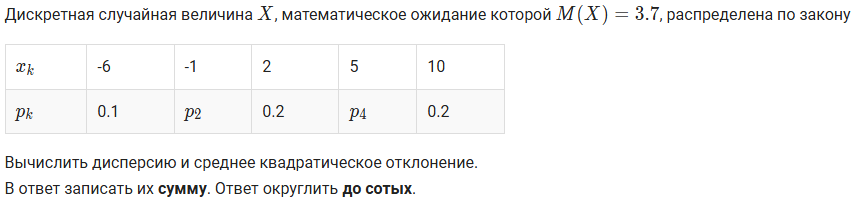

In [75]:
a, b = sp.symbols('a b')

X = np.array([-6, -4, 2, 5, 10])
P = np.array([0.1, a, 0.2, b, 0.2])
M = np.sum(X * P) - 3.7
display(M)
sp.solve(M, [a, b])

print(1 - (0.1 + 0.2 + 0.2))

-4*a + 5*b - 1.9

0.5


In [77]:
X = np.array([-6, -4, 2, 5, 10])
P = np.array([0.1, 0.25, 0.2, 0.25, 0.2])
M = 3.7

D = np.sum((X - M)**2 * P)
display(D)

print(D + np.sqrt(D))

33.17

38.929340239992776


In [78]:
X = np.array([-6, -4, 2, 5, 10])
P = np.array([0.1, 0.25, 0.2, 0.25, 0.2])
M = 3.7

D = np.sum(X**2 * P) - M**2
display(D)

print(D + np.sqrt(D))

20.959999999999997

25.538209256903837


In [66]:
# Случайная величина X имеет биномиальное распределение.
# C математическим ожиданием M(X)=2.4 и дисперсией D(X)=0.96.
# Найти вероятность события X<3.

# M(X)=n*p
# D(X)=n*p*q

In [67]:
# Дана непрерывная случайная величина. 
# Её плотность вероятности f(x) = c при 0 <= x <= 10


# Найти её математическое ожидание и дисперсию.
# В ответ записать их разность округленную до сотых.

# f(x) = F'(x)
# M(x) = integrate(x * f(x))
# D(x) = integrate((x - M(x)) * f(x)) 

x, c = sp.symbols('x c')

f = 0
display('Функция плотности вероятности', f)

M = sp.integrate(x * f, (x, 0, 10))
print(f'Математическое ожидание = {M}')

D = sp.integrate((x - M)**2 * f, (x, 0, 10))
print(f'Дисперсия = {D}')

print('Ответ: {}'.format(round(M + D,2)))

'Функция плотности вероятности'

0

Математическое ожидание = 0
Дисперсия = 0
Ответ: 0


In [68]:
11 / 36 + 25 / 36

1.0

## 6.4 Геометрическая интерпретация вероятности

In [69]:
# Метровую ленту случайным образом разрезают ножницами.
# Найти вероятность того, что длина обрезка составит не менее 80 см.

# Чтобы получить обрезок длиной 80 см, надо отрезать не более 20 см с одного из краёв. 
# По сути ножницы должны попасть в отрезок в 20 см с одной стороны ленты или 20 см с другой:

# P(80 <= X)

P = (20 + 20) / 100
P

0.4

# Задачи

In [70]:
# Определенный интеграл:

x = sp.Symbol('x')

f = sp.exp(sp.sqrt(x))/sp.sqrt(x)
display(f)

res = sp.integrate(f, (x, 0, 1))
res

exp(sqrt(x))/sqrt(x)

-2 + 2*E

In [71]:
x = sp.Symbol('x')

f = sp.cos(sp.log(sp.cos(2 * x)))**(sp.log(2) / (sp.log(sp.cos(x**2))))
ex = sp.Limit(f,x,0)
display(ex)

f_lim = ex.doit()
display(f_lim)

Limit(cos(log(cos(2*x)))**(log(2)/log(cos(x**2))), x, 0, dir='+')

16

In [81]:
# Найдите собственные значения матрицы

A = sp.Matrix([[1,1,1],
               [1,-2,-1],
               [0,3,2]])

list(A.eigenvals().keys())

[2, -1, 0]

In [85]:
# Найдите cosα, где α - угол между векторами {0, −4, 3} и {3, 4, 0}.

# Ответ округлите до сотых.

# a' @ b' = |a'| * |b'| * cosa

a = np.array([0, -4, 3])
b = np.array([3, 4, 0])

a_mod = np.sqrt(np.sum(a**2))
b_mod = np.sqrt(np.sum(b**2))

cosa = (a @ b) / (a_mod * b_mod)
cosa

-0.64

In [86]:
# В магазине представлено 15 видов цветов. 
# Вася хочет подарить на 8 марта цветок маме, сестре и подруге Маше. 
# Всем этим женщинам он хочет подарить по одному цветку, но все цветки - разных видов. 
# Сначала Вася выбирает цветок маме. Из оставшихся - выбирает цветок сестре. Из оставшихся видов - подруге.

# Сколькими способами Вася может сделать свой выбор?

15 * 14 * 13

2730

In [87]:
# На лето учащимся школы было задано прочитать два произведения: «Преступление и наказание» и «Отцы и дети». 
# Всего учащихся 65, и каждый из них прочел хотя бы одно из этих произведений. 
# Известно, что «Преступление и наказание» прочли 47 человек, оба произведения прочли 15 человек.

# Сколько человек прочли «Отцы и дети»?

n = 65
pn = 47
pn_od = 15
od = n - pn + pn_od
od

33

In [88]:
# На столе лежит две монеты: 
# одна обыкновенная, а другая «счастливая» — орел на ней выпадает с вероятностью 1. 
# Наугад выбираются одна монета и подбрасывается три раза. 
# Какова вероятность, что эта монета обыкновенная, если все три раза выпал орел?

# Запишите ответ в виде десятичной дроби, округлив её до двух знаков после точки.

P_H1 = P_H2 = 0.5
P_A_H1 = 1
P_A_H2 = 0.5 * 0.5 * 0.5

P_A = P_H1 * P_A_H1 + P_H2 * P_A_H2 # Полная вероятность выбросить цифру 4

# P_H1_A * P_A = P_A_H1 * P_H1 - формула Байеса

P_A_H2 = (P_A_H2 * P_H2) / P_A
round(P_A_H2, 2)

0.11

In [90]:
# Из корзины, в которой лежит 4 черных и 6 белых шаров, по очереди достают 3 шара в случайном порядке.

# Какова вероятность, что все три вынутых шара белые?
# Ответ округлите до сотых.

p3 = cnk(3, 6) * cnk(0, 4) / cnk(3, 10) 
round(p3, 2)

0.17

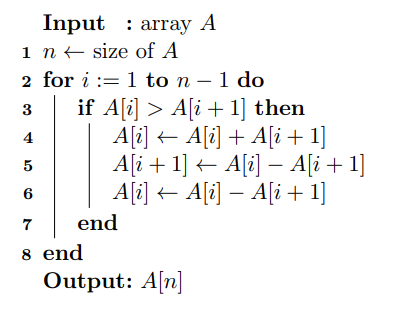

In [93]:
A = [3, -2, 4, -1, 6, 5, 0, 3, -1, 1]
n = len(A)
for i in range(n-1):
    if A[i] > A[i+1]:
        A[i] += A[i+1]
        A[i+1] = A[i] - A[i+1]
        A[i] += A[i] - A[i+1]

A[-1]

6

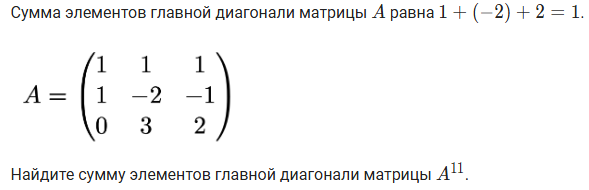

In [107]:
A = sp.Matrix([[1, 1, 1],
               [1,-2,-1],
               [0, 3, 2]])

# Собственные значения матрицы
eigs = np.array(list(A.eigenvals().keys()))
eigs**11

array([2048, -1, 0], dtype=object)

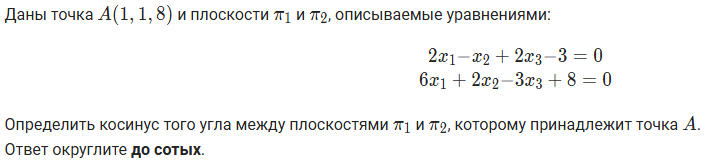

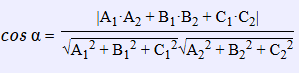

In [108]:
A = np.array([2, -1, 2,])
B = np.array([6, 2, -3,])

cosa = np.sum(A * B) / (np.sqrt(np.sum(A**2)) * np.sqrt(np.sum(B**2)))
cosa

0.19047619047619047

In [110]:
# В магазине представлено 15 видов цветов, из которых ровно 4 — виды роз. 
# Покупатель хочет собрать букет из 7 цветков, в котором есть хоть одна роза, 
# а суммарно ровно 4 вида цветов.

# Сколькими способами он может это сделать?
# Цветы одного вида считаются одинаковыми.

In [121]:
# На лето 200 учащимся школы было задано прочитать три произведения: 
# «Война и мир», «Преступление и наказание» и «Отцы и дети». 
# Известно, что ровно 150 учеников прочитали «Войну и мир», 
# ровно 134 — «Преступление и наказание» и ровно 168 — «Отцы и дети».

# Какое наименьшее число учащихся могло прочесть все три произведения?

n = 200
v = 150
p = 134
o = 168

v_ = n - v
p_ = n - p
o_ = n - o

n - v_ - p_ - o_

52

In [125]:
# Из корзины, в которой лежит 4 черных и 6 белых шаров, по очереди достают 3 шара в случайном порядке.
# Из корзины достали еще три шара.

# Найдите математическое ожидание числа белых шаров среди всех шести вынутых.

In [ ]:
def alg(k):
    c = 1
    A = [0] * k

    for i in range(2, int(k**0.5 + 1)):
        if k % 2 == 0:
            a = i
            b = k // a
            if (a % 3 == 0) and (A[a] == 0):
                c = c * i
                A[a] = 1
            if (b % 3 == 0) and (A[b] == 0):
                c = c * b
                A[b] = 1

    return c

for x in range(1, 1000000):
    a = alg(x)
    if a == 162:
        print(x)
        break

18


In [ ]:
import numpy as np
A = np.zeros([5, 5])

for n in range(5):
	for k in range(5):
		A[n,k] = (n + 1) * (k +1)
		
np.greater(A, 10).sum()

8

In [ ]:
A = '5	43	20	7	13	7	20	13	2	33	15	5'
A = list(map(int, A.split()))

s = 0
for i in range(1, 12):
    if (A[i-1] / A[i] < 2):
        s += A[i]
    else:
        A[i] = A[i] * i
s

129

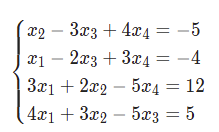

In [ ]:
# Решить систему линейных алгебраических уравнений
import sympy as sp
A = sp.Matrix([[1, 0, 2], 
              [2, -1, 1],
              [1, 3, -1]])

C = A.inv()

for i in range(3):
    for j in range(3):
        if i != j:
            C[i, j] = 0
sum(C)

-1/2

In [ ]:
A = np.array([[3, -1], 
              [5, -2]])

B = np.array([[14, 16], 
              [9, 10]])

D = np.array([[5, 6], 
              [7, 8]])

D = np.linalg.inv(D)

C = np.linalg.solve(A, B @ D)

sp.Matrix(C).det()

-2.00000000000000

In [ ]:
import sympy as sp
# Функция limit()
n = sp.Symbol('n')

f = (1 - 3 * n**2) * sp.atan(n / (3 * n**2 - 1)) ** 2
display(f)

f_lim = sp.limit(f,n,sp.oo)
display(round(f_lim, 2))

# Первым аргументом мы подаем саму функцию, 
# потом переменную, по которой мы будем брать предел, 
# последний аргумент - точка к которой мы стремим переменную.

(1 - 3*n**2)*atan(n/(3*n**2 - 1))**2

-0.33